In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from decimal import Decimal
import prospect.io.read_results as pread
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [118]:
caesar_data = pd.read_pickle('/Users/sidneylower/Documents/caesar_galaxy_properties_evo2000.pkl')

caesar_sfr50 = np.load('/Users/sidneylower/Documents/snap305_dirichlet/caesar_sfr50.npz')




In [181]:
tau = pd.read_pickle('/Users/sidneylower/Documents/snap305_dirichlet/prospectorsnap305_properties_ParametricTau_1566956431.9687512.pkl')
burst = pd.read_pickle('/Users/sidneylower/Documents/snap305_dirichlet/prospectorsnap305_properties_ParametricTau+Burst_1566956431.9682534.pkl')
diri = pd.read_pickle('/Users/sidneylower/Documents/snap305_dirichlet/prospectorsnap305_properties_Dirichlet_SFRunc.pkl')

cont = pd.read_pickle('/Users/sidneylower/Documents/snap305_dirichlet/prospectorsnap305_properties_Continuity_SFRunc.pkl')
#cont_old = pd.read_pickle('/Users/sidneylower/Documents/snap305_dirichlet/prospectorsnap305_properties_Continuity.pkl')

fixedmetal_dir = pd.read_pickle('/Users/sidneylower/Documents/snap305_dirichlet/prospectorsnap305_properties_fixedmetal.pkl')


cont_massmetal = pd.read_pickle('/Users/sidneylower/Documents/snap305_dirichlet/prospectorsnap305_properties_ContMM_1566826782.257914.pkl')


dir_massmetal = pd.read_pickle('/Users/sidneylower/Documents/snap305_dirichlet/prospectorsnap305_properties_Dirichlet_massmetal.pkl')

In [120]:
import random
galaxies_in_dir = list(dict.fromkeys(dir_massmetal.index.get_level_values('Galaxy')))
galaxies_in_cont = list(dict.fromkeys(cont_massmetal.index.get_level_values('Galaxy')))
galaxies_in_tau = list(dict.fromkeys(tau.index.get_level_values('Galaxy')))



In [121]:
galaxies_in_all = set.intersection(*map(set,[galaxies_in_dir, galaxies_in_cont, galaxies_in_tau]))
galaxy_list = [int(x) for x in galaxies_in_all]

In [122]:
dust_list = [40, 77, 360, 433, 434, 442, 455, 533, 592, 658, 754, 756, 783, 1317, 1649]

In [123]:
d_massmetal_dmass = dir_massmetal.loc[(slice(None), list(dict.fromkeys(dir_massmetal.index.get_level_values('Time [Gyr]')))[0]), 'Derived Stellar Mass']
d_massmetal_imass = dir_massmetal.loc[(slice(None), list(dict.fromkeys(dir_massmetal.index.get_level_values('Time [Gyr]')))[0]), 'Intrinsic Stellar Mass']

d_massmetal_imass /= 1.989e33


tau_dmass = tau.loc[(slice(None), list(dict.fromkeys(tau.index.get_level_values('Time [Gyr]')))[0]), 'Derived Stellar Mass']
tau_imass = tau.loc[(slice(None), list(dict.fromkeys(tau.index.get_level_values('Time [Gyr]')))[0]), 'Intrinsic Stellar Mass']


tau_imass /= 1.989e33


burst_dmass = burst.loc[(slice(None), list(dict.fromkeys(burst.index.get_level_values('Time [Gyr]')))[0]), 'Derived Stellar Mass']
burst_imass = burst.loc[(slice(None), list(dict.fromkeys(burst.index.get_level_values('Time [Gyr]')))[0]), 'Intrinsic Stellar Mass']


burst_imass /= 1.989e33

cont_dmass = cont.loc[(slice(None), list(dict.fromkeys(cont.index.get_level_values('Time [Gyr]')))[0]), 'Derived Stellar Mass']
cont_imass = cont.loc[(slice(None), list(dict.fromkeys(cont.index.get_level_values('Time [Gyr]')))[0]), 'Intrinsic Stellar Mass']


cont_imass /= 1.989e33

c_massmetal_dmass = cont_massmetal.loc[(slice(None), list(dict.fromkeys(cont_massmetal.index.get_level_values('Time [Gyr]')))[0]), 'Derived Stellar Mass']
c_massmetal_imass = cont_massmetal.loc[(slice(None), list(dict.fromkeys(cont_massmetal.index.get_level_values('Time [Gyr]')))[0]), 'Intrinsic Stellar Mass']

c_massmetal_imass /= 1.989e33



In [58]:
fixedmetal_dmass = fixedmetal_dir.loc[(slice(None), list(dict.fromkeys(fixedmetal_dir.index.get_level_values('Time [Gyr]')))[0]), 'Derived Stellar Mass']
fixedmetal_imass = fixedmetal_dir.loc[(slice(None), list(dict.fromkeys(fixedmetal_dir.index.get_level_values('Time [Gyr]')))[0]), 'Intrinsic Stellar Mass']

fixedmetal_imass /= 1.989e33


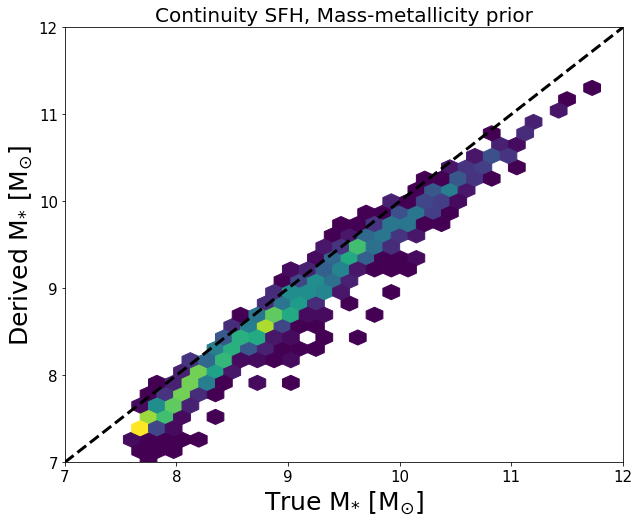

In [51]:
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
plt.plot([7, 13], [7, 13], color='black', ls='--', lw=3)

plt.hexbin(np.log10(c_massmetal_imass), np.log10(c_massmetal_dmass), gridsize=40, extent=(7, 13, 7, 13), mincnt=1, label=None)
#cbar = plt.colorbar()

#plt.scatter(np.log10(c_massmetal_imass), np.log10(c_massmetal_dmass), s=50, color='gray', marker='+', zorder=10, label='Continuity Prior')
#plt.scatter(np.log10(burst_imass), np.log10(burst_dmass), s=50, color='darkorange', marker='x', zorder=0, label=r'Delayed $\tau$+Burst')

#cbar.set_label('N', fontsize=20)
plt.ylim([7, 12])
plt.xlim([7, 12])
plt.xlabel('True M$_\mathrm{*}$ [M$_{\odot}$]', fontsize=25)
plt.ylabel('Derived M$_\mathrm{*}$ [M$_{\odot}$]', fontsize=25)

plt.title('Continuity SFH, Mass-metallicity prior', fontsize=20)
#plt.legend(loc='upper left', fontsize=15)
plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/mass_metal_1to1.png', dpi=300)

In [59]:
ratio_fm = fixedmetal_dmass / fixedmetal_imass
fm_median = np.median(ratio_fm)



ratio_mm_c = c_massmetal_dmass / c_massmetal_imass
mmc_median = np.median(ratio_mm_c)

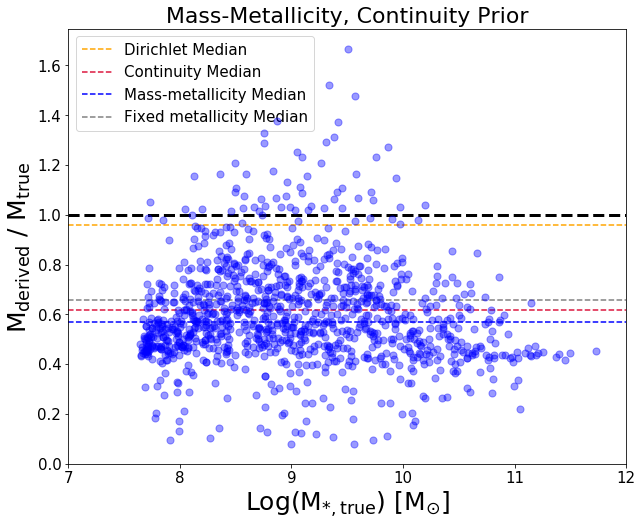

In [60]:
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
plt.plot([7, 13], [1.0, 1.0], color='black', ls='--', lw=3)


plt.scatter(np.log10(c_massmetal_imass), ratio_mm_c, s=50, color='blue', marker='o', alpha=0.4, zorder=10)

plt.plot([7, 13], [d_med, d_med], color='orange', ls='--', label='Dirichlet Median')
plt.plot([7, 13], [c_med, c_med], color='crimson', ls='--', label='Continuity Median')
plt.plot([7, 13], [mmc_median, mmc_median], color='blue', ls='--', label='Mass-metallicity Median')
plt.plot([7, 13], [fm_median, fm_median], color='grey', ls='--', label='Fixed metallicity Median')
#plt.ylim([7, 12])
plt.xlim([7, 12])
plt.xlabel('Log(M$_\mathrm{*, true}$) [M$_{\odot}$]', fontsize=25)
plt.ylabel('M$_\mathrm{derived}$ / M$_\mathrm{true}$', fontsize=25)

plt.title('Mass-Metallicity, Continuity Prior', fontsize=22)
plt.legend(loc='upper left', fontsize=15)

plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/mass_metallicity.png', dpi=300, bbox_inches='tight')

In [25]:
mmc_median, c_med

(0.5691337988035611, 0.6154695049035023)

In [196]:
galaxies_in_dir = list(dict.fromkeys(diri.index.get_level_values('Galaxy')))
galaxies_in_cont = list(dict.fromkeys(cont.index.get_level_values('Galaxy')))
galaxies_in_tau = list(dict.fromkeys(tau.index.get_level_values('Galaxy')))
galaxies_in_burst = list(dict.fromkeys(burst.index.get_level_values('Galaxy')))
galaxy_membership = [galaxies_in_dir, galaxies_in_cont, galaxies_in_tau, galaxies_in_burst]

galaxies_in_dir = [int(x) for x in galaxies_in_dir]

galaxies_in_all = set.intersection(*map(set,galaxy_membership))
galaxy_list = sorted([int(x) for x in galaxies_in_all])

In [346]:
dir_masses_smf = []
cont_masses_smf = []
burst_masses_smf = []
tau_masses_smf = []

for i in galaxy_list:
    dir_masses_smf.append(list(dict.fromkeys(diri.loc[['{0:03}'.format(i)]]['Derived Stellar Mass']))[0])
    cont_masses_smf.append(list(dict.fromkeys(cont.loc[['{0:03}'.format(i)]]['Derived Stellar Mass']))[0])
    burst_masses_smf.append(list(dict.fromkeys(burst.loc[['{0:03}'.format(i)]]['Derived Stellar Mass']))[0])
    tau_masses_smf.append(list(dict.fromkeys(tau.loc[['{0:03}'.format(i)]]['Derived Stellar Mass']))[0])


In [92]:
dir_ratio = np.log10(dir_dmasses / dir_imasses)
cont_ratio = np.log10(cont_dmasses / cont_imasses)
caesar_masses = caesar_data.loc[(slice(None), list(dict.fromkeys(caesar_data.index.get_level_values('Redshift')))[0]), 'Stellar Mass']

NameError: name 'dir_dmasses' is not defined

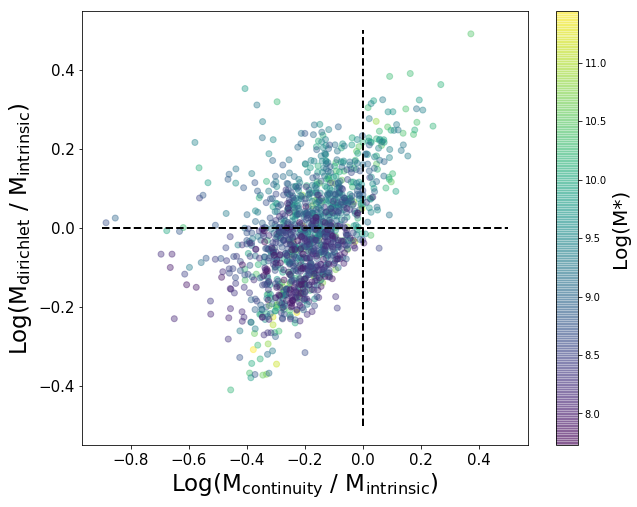

In [344]:
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
plt.scatter(cont_ratio, dir_ratio, c=np.log10(caesar_masses[galaxies_in_both]), alpha=0.4)
cbar = plt.colorbar()
cbar.set_label('Log(M*)', fontsize=20)
plt.plot([0, 0], [-0.5, 0.5], ls='--', lw=2, color='black')
plt.plot([-0.9, 0.5], [0, 0], ls='--', lw=2, color='black')
plt.ylabel('Log(M$_\mathrm{dirichlet}$ / M$_\mathrm{intrinsic}$)', fontsize=23)
plt.xlabel('Log(M$_\mathrm{continuity}$ / M$_\mathrm{intrinsic}$)', fontsize=23)

plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/dir_vs_cont.png', dpi=300)

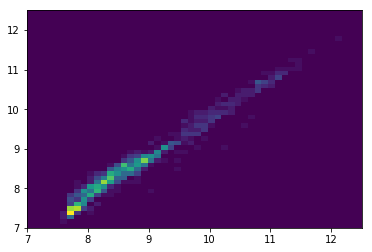

In [49]:
counts_t,xbins_t,ybins_t,image = plt.hist2d(np.log10(tau_imass), np.log10(tau_dmass), bins=20,range=[[7., 12.5], [7., 12.5]])
counts_b,xbins_b,ybins_b,image = plt.hist2d(np.log10(burst_imass), np.log10(burst_dmass), bins=50, range=[[7., 12.5], [7., 12.5]])


In [615]:
np.log10(np.max(burst_imass))

12.153905578379497

In [652]:
np.max(counts_b)

26.0

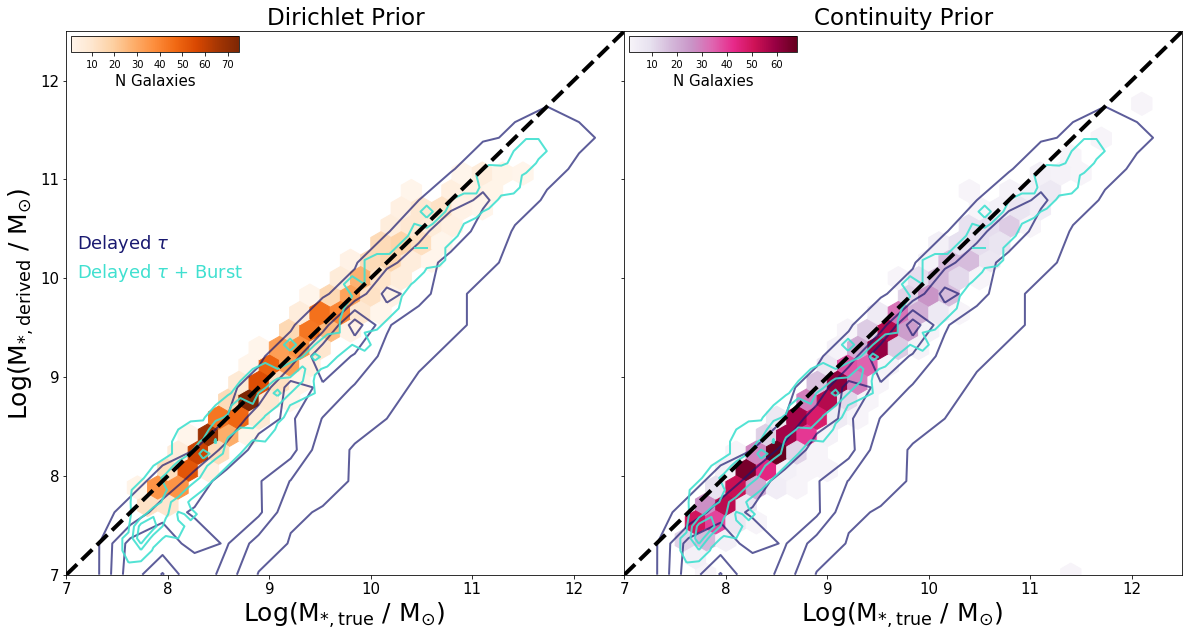

In [463]:


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 10))
plt.subplots_adjust(wspace=0, hspace=0)
for ax in (ax1, ax2):
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor')
    ax.plot([7, 13], [7, 13], color='black', ls='--', lw=4)
    ax.set_ylim([7, 12.5])
    ax.set_xlim([7, 12.5])
    ax.set_xlabel('Log(M$_\mathrm{*, true}$ / M$_{\odot}$) ', fontsize=25)
    ax1.set_ylabel('Log(M$_\mathrm{*, derived}$ / M$_{\odot}$) ', fontsize=25)
    ax.contour(counts_t.transpose(),levels=np.linspace(1.0, 51.0, 4),extent=[7, 13, 7, 13],linewidths=2, colors='midnightblue', alpha=0.7)
    ax.contour(counts_b.transpose(),levels=np.linspace(1.0, 27.0, 4), extent=[7, 13, 7, 13], linewidths=2, colors='turquoise', alpha=0.9)
    
    
a = ax1.hexbin(np.log10(dir_imass), np.log10(dir_dmass), gridsize=30, extent=(7, 13, 7, 13), mincnt=1, label=None, cmap = plt.cm.Oranges)    
cbaxes = inset_axes(ax1, width="30%", height="3%", loc='upper left') 
cbar_a = fig.colorbar(a, cax=cbaxes, orientation='horizontal', label='N Galaxies')
cbar_a.set_label('N Galaxies', fontsize=15)
b = ax2.hexbin(np.log10(cont_imass), np.log10(cont_dmass),gridsize=30, extent=(7, 13, 7, 13), mincnt=1, label=None, cmap = plt.cm.PuRd)
cbaxes = inset_axes(ax2, width="30%", height="3%", loc='upper left') 
cbar_b = fig.colorbar(b, cax=cbaxes, orientation='horizontal')
cbar_b.set_label('N Galaxies', fontsize=15)
ax1.set_title('Dirichlet Prior', fontsize=23)
ax2.set_title('Continuity Prior', fontsize=23)
#ax1.legend(loc='upper left', fontsize=15)

ax1.annotate(r'Delayed $\tau$', xy=(7.1, 10.3), color='midnightblue', fontsize=18)
ax1.annotate(r'Delayed $\tau$ + Burst', xy=(7.1, 10.0), color='turquoise', fontsize=18)
plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/mass_comp.png', dpi=300, bbox_inches='tight')




In [124]:
ratio_d = d_massmetal_dmass / d_massmetal_imass
ratio_t = tau_dmass / tau_imass
ratio_b = burst_dmass / burst_imass
ratio_c = c_massmetal_dmass / c_massmetal_imass

d_med = np.median(ratio_d)
b_med = np.median(ratio_b)
t_med = np.median(ratio_t)
c_med = np.median(ratio_c)

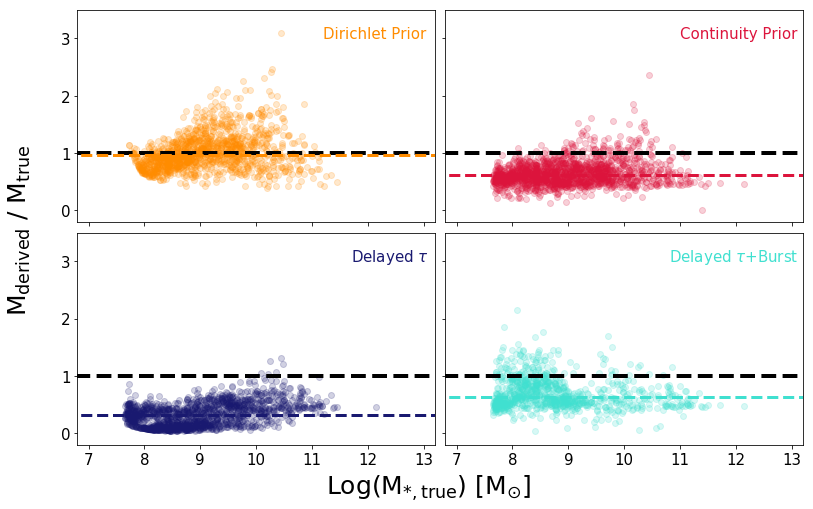

In [532]:
fig, ax = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(13, 8))
plt.subplots_adjust(wspace=0.03, hspace=0.05)
for i in [0, 1]:
    for j in [0, 1]:
        ax[i, j].tick_params(axis='both', which='major', labelsize=15)
        ax[i, j].tick_params(axis='both', which='minor')
        ax[i, j].plot([6, 14], [1.0, 1.0], ls='--', lw = 4, color='black')
        ax[i, j].set_ylim([-0.2, 3.5])
        ax[i, j].set_xlim([6.8, 13.2])
        
cont_plot = ax[0,1].scatter(np.log10(cont_imass), ratio_c, color='crimson',alpha=0.2, label='Continuity Prior')
diri_plot = ax[0, 0].scatter(np.log10(dir_imass), ratio_d, color='darkorange',alpha=0.2,label='Dirichlet prior')
burst_plot = ax[1, 1].scatter(np.log10(burst_imass),ratio_b, color='turquoise', alpha=0.2, label=r'Delayed $\tau$+Burst')
tau_plot = ax[1, 0].scatter(np.log10(tau_imass), ratio_t, color='midnightblue',alpha=0.2, label=r'Delayed $\tau$')

ax[0, 0].plot([6, 14],[d_med, d_med], lw=3, ls='--', color='darkorange')
ax[0, 0].annotate('Dirichlet Prior', xy=(11.2, 3), fontsize=15, color='darkorange')
ax[1, 1].plot([6, 14],[b_med, b_med], lw=3, ls='--', color='turquoise')
ax[1, 1].annotate(r'Delayed $\tau$+Burst', xy=(10.8, 3), fontsize=15, color='turquoise')
ax[1, 0].plot([6, 14],[t_med, t_med],  lw=3, ls='--', color='midnightblue')
ax[1, 0].annotate(r'Delayed $\tau$', xy=(11.7, 3), fontsize=15, color='midnightblue')
ax[0, 1].plot([6, 14], [c_med, c_med],  lw=3, ls='--', color='crimson')
ax[0, 1].annotate('Continuity Prior', xy=(11, 3), fontsize=15, color='crimson')

#ax[0, 1].legend((diri_plot, cont_plot, burst_plot, tau_plot), ('Dirichlet Prior', 'Continuity Prior', r'Delayed $\tau$+Burst',r'Delayed $\tau$'), loc='center left', fontsize=15, bbox_to_anchor=(1., 0.5))


fig.text(0.5, 0.04, 'Log(M$_\mathrm{*, true}$) [M$_{\odot}$]', ha='center', fontsize=25)
fig.text(0.05, 0.5, 'M$_\mathrm{derived}$ / M$_\mathrm{true}$ ', va='center', rotation='vertical', fontsize=25)





plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/ratio_panel.png', dpi=300,  bbox_inches='tight')



In [293]:
ratio_d.argmin()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  """Entry point for launching an IPython kernel.


('267', 13.599999999)

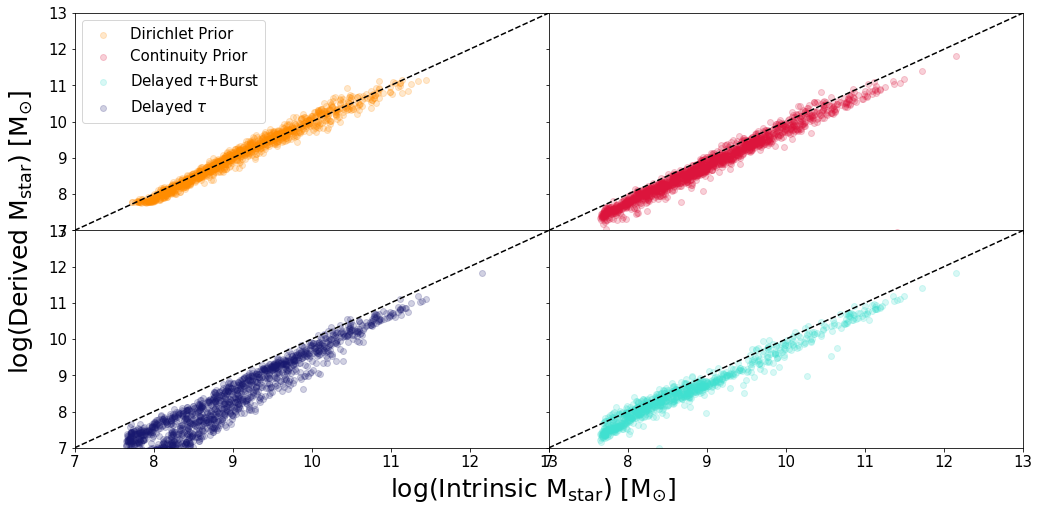

In [373]:



fig, ax = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(17, 8))
plt.subplots_adjust(wspace=0, hspace=0)
for i in [0, 1]:
    for j in [0, 1]:
        ax[i, j].tick_params(axis='both', which='major', labelsize=15)
        ax[i, j].tick_params(axis='both', which='minor')
        ax[i, j].plot([7, 13], [7, 13], ls='--', color='black')
        ax[i, j].set_ylim([7, 13.0])
        ax[i, j].set_xlim([7, 13.0])
        
cont_plot = ax[0,1].scatter(np.log10(cont_imass), np.log10(cont_dmass), color='crimson',alpha=0.2, label='Continuity Prior')
diri_plot = ax[0, 0].scatter(np.log10(dir_imass), np.log10(dir_dmass), color='darkorange',alpha=0.2,label='Dirichlet prior')
burst_plot = ax[1, 1].scatter(np.log10(burst_imass),np.log10(burst_dmass), color='turquoise', alpha=0.2, label=r'Delayed $\tau$+Burst')
tau_plot = ax[1, 0].scatter(np.log10(tau_imass), np.log10(tau_dmass), color='midnightblue',alpha=0.2, label=r'Delayed $\tau$')

fig.text(0.5, 0.04, 'log(Intrinsic M$_\mathrm{star}$) [M$_{\odot}$]', ha='center', fontsize=25)
fig.text(0.07, 0.5, 'log(Derived M$_\mathrm{star}$) [M$_{\odot}$]', va='center', rotation='vertical', fontsize=25)

ax[0, 0].legend((diri_plot, cont_plot, burst_plot, tau_plot), ('Dirichlet Prior', 'Continuity Prior', r'Delayed $\tau$+Burst',r'Delayed $\tau$'), loc='upper left', fontsize=15)





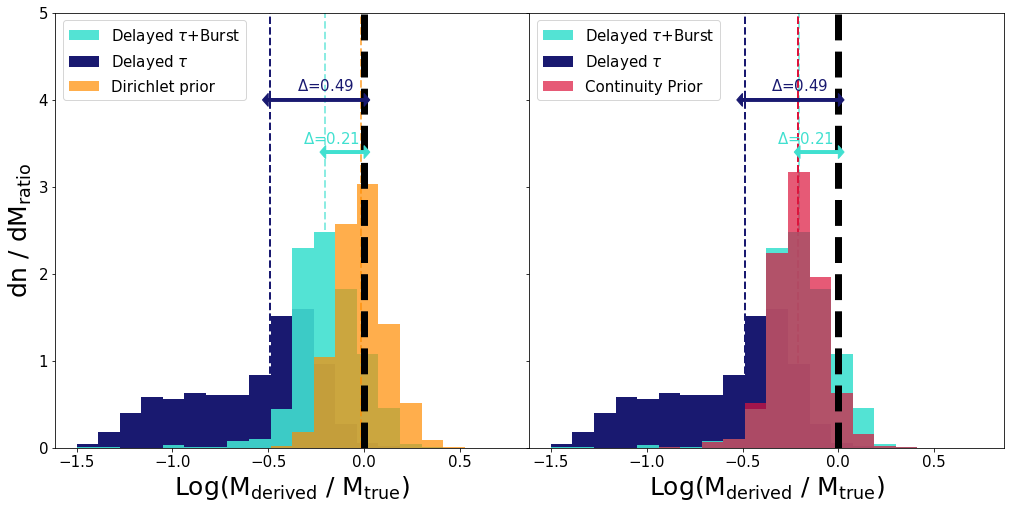

In [439]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(17, 8))
plt.subplots_adjust(wspace=0, hspace=0)
for ax in (ax1, ax2):
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor')
    _, _, _ = ax.hist(ratio_b, bins=20,  color='turquoise', range=(-1.5, 0.75), alpha=0.9, lw=5, density=True, zorder=2,label=r'Delayed $\tau$+Burst')
    _, _, _ = ax.hist(ratio_t, bins=20,  color='midnightblue', range=(-1.5, 0.75),lw=5, density=True, zorder=1, label=r'Delayed $\tau$')

    ax1.plot([d_med, d_med], [0, 10], lw=2, ls='--', color='darkorange', alpha=0.4)
    ax.plot([b_med, b_med], [2.5, 10], lw=2, ls='--', color='turquoise', alpha=0.6, zorder=0)
    ax.plot([t_med, t_med], [0, 10], lw=2, ls='--', color='midnightblue', zorder=0)
    ax2.plot([c_med, c_med], [0, 10], lw=2, ls='--', color='crimson', zorder=0)
    ax.plot([0.0, 0.0], [0, 10], lw=7, ls='--', zorder=11, color='black')
    
    ax.annotate(r'$\Delta$='+"{:.2f}".format(0.0 - b_med), xy=(-.32, 3.5), color='turquoise', fontsize=15)
    ax.arrow(-0.2, 3.4, 0.2, 0.0, color='turquoise', width = 0.03, head_length = 0.03, head_width = 0.15,zorder=15)
    ax.arrow(0.0, 3.4, -0.2, 0.0, color='turquoise', width = 0.03, head_length=0.03, head_width = 0.15, zorder=15)



    ax.annotate(r'$\Delta$='+"{:.2f}".format(0.0 - t_med), xy=(-0.35, 4.1), color='midnightblue', fontsize=15)
    ax.arrow(-0.5, 4.0, 0.5, 0.0, color='midnightblue', width = 0.03, head_length = 0.03, head_width = 0.15,zorder=15)
    ax.arrow(0.0, 4.0, -0.5, 0.0, color='midnightblue', width = 0.03, head_length=0.03, head_width = 0.15, zorder=15)
    
    ax.set_xlabel('Log(M$_\mathrm{derived}$ / M$_\mathrm{true}$)', fontsize=25)
    ax1.set_ylabel('dn / dM$_\mathrm{ratio}$', fontsize=25)
    ax.set_ylim([0, 5])
    #ax.set_xlim([-0.25, 3])

_, _, _ = ax2.hist(ratio_c, bins=20,  color='crimson', range=(-1.5, 0.75),alpha=0.7, lw=5, density=True, zorder=3, label='Continuity Prior')

_, _, _ = ax1.hist(ratio_d, bins=20,  color='darkorange',range=(-1.5, 0.75), alpha=0.7, lw=5, density=True, zorder=10, label='Dirichlet prior')


ax1.legend(loc='upper left', fontsize=15)
ax2.legend(loc='upper left', fontsize=15)


plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/ratio.png', dpi=300, bbox_inches='tight')



In [67]:
gal=0
dir_timelist = list(dict.fromkeys(dir_massmetal.index.get_level_values('Time [Gyr]')))
dir_sfrlist = list(dict.fromkeys(dir_massmetal.loc[['{0:03}'.format(gal)]]['SFR']))
dir_sfr16 = list(dict.fromkeys(dir_massmetal.loc[['{0:03}'.format(gal)]]['SFR_16']))
dir_sfr84 = list(dict.fromkeys(dir_massmetal.loc[['{0:03}'.format(gal)]]['SFR_84']))

#dir_bestfit = list(dict.fromkeys(diri_old.loc[['{0:03}'.format(gal)]]['SFR']))




c_timelist = list(dict.fromkeys(caesar_data.index.get_level_values('Time [Gyr]')))
c_sfrlist = caesar_data.loc[[gal]]['SFR']

tau_timelist = list(dict.fromkeys(tau.index.get_level_values('Time [Gyr]')))
tau_sfrlist = list(dict.fromkeys(tau.loc[['{0:03}'.format(gal)]]['SFR']))


burst_timelist = list(dict.fromkeys(burst.index.get_level_values('Time [Gyr]')))
burst_sfrlist = list(dict.fromkeys(burst.loc[['{0:03}'.format(gal)]]['SFR']))


'''cont_timelist = list(dict.fromkeys(cont.index.get_level_values('Time [Gyr]')))
cont_sfrlist = list(dict.fromkeys(cont.loc[['{0:03}'.format(gal)]]['SFR']))
cont_sfr16 = list(dict.fromkeys(cont.loc[['{0:03}'.format(gal)]]['SFR_16']))
cont_sfr84 = list(dict.fromkeys(cont.loc[['{0:03}'.format(gal)]]['SFR_84']))'''




cont_timelist = list(dict.fromkeys(cont_massmetal.index.get_level_values('Time [Gyr]')))
cont_sfrlist = list(dict.fromkeys(cont_massmetal.loc[['{0:03}'.format(gal)]]['SFR']))
cont_sfr16 = list(dict.fromkeys(cont_massmetal.loc[['{0:03}'.format(gal)]]['SFR_16']))
cont_sfr84 = list(dict.fromkeys(cont_massmetal.loc[['{0:03}'.format(gal)]]['SFR_84']))

KeyError: "['000'] not in index"

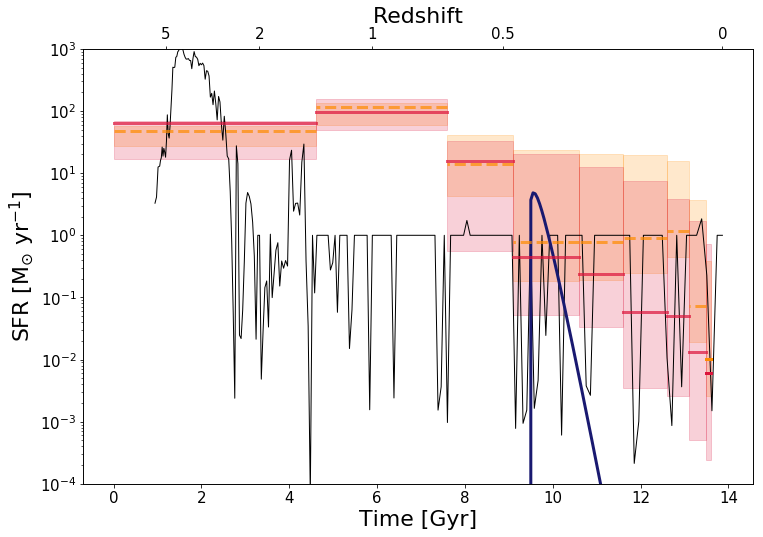

In [68]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.tick_params(axis='both', which='minor')
ax1.plot(c_timelist, c_sfrlist, lw=1, color='black', label='Intrinsic SFH')
ax1.plot(tau_timelist, tau_sfrlist, lw=3, color='midnightblue', label=r'$\tau$ SFH')
#ax1.plot(burst_timelist, burst_sfrlist, lw=3, color='turquoise', label=r'$\tau$+Burst SFH')

ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='minor')


for i in range(9):
    ax1.plot([dir_timelist[i], dir_timelist[i+1]], [dir_sfrlist[i], dir_sfrlist[i]], color='darkorange', lw=3, alpha=0.7, ls='--')
    ax1.fill_between([dir_timelist[i], dir_timelist[i+1]], y1=dir_sfr16[i], y2=dir_sfr84[i], color='darkorange', alpha=0.2)
for i in range(9):
    ax1.plot([13.6 - cont_timelist[i], 13.6 - cont_timelist[i+1]], [cont_sfrlist[i], cont_sfrlist[i]], color='crimson', lw=3, alpha=0.7)
    ax1.fill_between([13.6 - cont_timelist[i], 13.6 - cont_timelist[i+1]], y1=cont_sfr16[i], y2=cont_sfr84[i], color='crimson', alpha=0.2)


    
ax1.plot([dir_timelist[0],dir_timelist[1]], [dir_sfrlist[0], dir_sfrlist[0]], color='darkorange', lw=3, label='Dirichlet SFH')
ax1.plot([13.6 - cont_timelist[0],13.6 - cont_timelist[1]], [cont_sfrlist[0], cont_sfrlist[0]], color='crimson', lw=3, label='Continuity SFH')

ax1.set_xlabel('Time [Gyr]', fontsize=22)
ax1.set_ylabel('SFR [M$_{\odot}$ yr$^{-1}$]', fontsize=22)

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks([13.86, 8.865, 5.89, 3.32, 1.182])
ax2.set_xticklabels(['0', '0.5', '1', '2', '5'])
ax2.set_xlabel('Redshift', fontsize=22)
ax1.set_yscale('log')
ax1.set_ylim([1e-4, 1e3])

ax1.annotate('Galaxy '+str(gal)+'\n M* ='+"{:.3e}".format(Decimal(str(diri.loc[['{0:03}'.format(gal)]]['Intrinsic Stellar Mass'][0] / 1.989e33)))+' M$_{\odot}$', xy=(0, 1e2), fontsize=15)

ax1.legend(loc='lower right', fontsize=15)



plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/SFH_'+str(gal)+'.png', dpi=300)


In [ ]:
for galaxy in galaxies_in_dir:
    sfrs

In [358]:
log_dsmass = np.log10(dir_dmass)
log_bsmass = np.log10(burst_dmass)
log_truesmass = np.log10(caesar_masses[galaxies_in_dir])
log_tsmass = np.log10(tau_dmass) 
log_csmass = np.log10(cont_dmass)

In [359]:
sbinsd = [] #dirichlet
sbinst = [] #pd
sbinsb = [] #burst
sbinstrue = [] #tau
sbinsc = [] #cont
bin_size = 0.35
bins_ = np.arange(8.0, 13.0, bin_size)
for i in bins_:
    numd = len(log_dsmass[(log_dsmass > i) & (log_dsmass < i+bin_size)])
    numb = len(log_bsmass[(log_bsmass > i) & (log_bsmass < i+bin_size)])
    numtrue = len(log_truesmass[(log_truesmass > i) & (log_truesmass < i+bin_size)])
    numt = len(log_tsmass[(log_tsmass > i) & (log_tsmass < i+bin_size)])
    numc = len(log_csmass[(log_csmass > i) & (log_csmass < i+bin_size)])
    sbind = numd / (25**3)
    sbint = numt / (25**3)
    sbinb = numb / (25**3) 
    sbinc = numc / (25**3) 
    sbintrue = numtrue / (25**3)
    sbinsd.append(sbind)
    sbinstrue.append(sbintrue)
    sbinsb.append(sbinb)
    sbinst.append(sbint)
    sbinsc.append(sbinc)

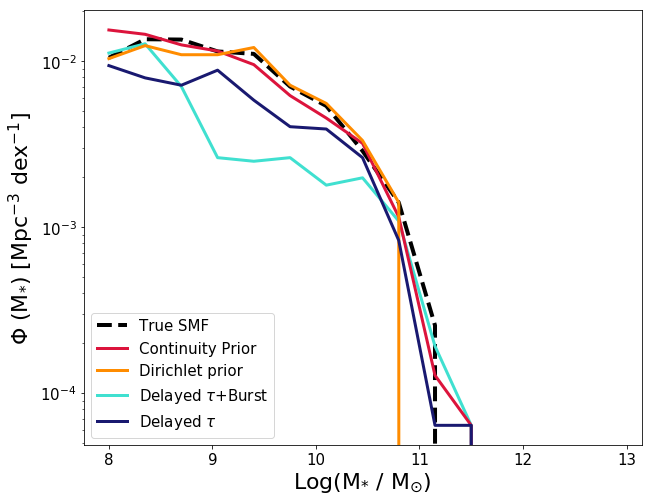

In [449]:
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
plt.plot(bins_, sbinstrue, color='black', lw=4, ls='--', zorder=0, label='True SMF')
plt.plot(bins_, sbinsc, color='crimson', lw=3 ,label='Continuity Prior')
plt.plot(bins_, sbinsd, color='darkorange', lw=3,  label='Dirichlet prior')
plt.plot(bins_, sbinsb, color='turquoise', lw=3, zorder=0, label=r'Delayed $\tau$+Burst')
plt.plot(bins_, sbinst, color='midnightblue', lw=3 ,label=r'Delayed $\tau$')
#plt.errorbar(bins_, sbinsd, xerr=a, ls='none', color='orange', capsize=5)
plt.yscale('log')
#plt.ylim([1e-5, 1e-1])
plt.ylabel('$\Phi$ (M$_\mathrm{*}$) [Mpc$^{-3}$ dex$^{-1}$]', fontsize=22)
plt.xlabel('Log(M$_\mathrm{*}$ / M$_{\odot}$)', fontsize=22)
plt.legend(loc='lower left', fontsize=15)


plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/stellarmassfunc.png', dpi=300,  bbox_inches='tight')


In [371]:
dir_sfrs = list(dict.fromkeys(diri['SFR']))[::11]
tau_sfrs = tau['SFR'][269::270]
cont_sfrs = list(dict.fromkeys(cont['SFR']))[::10]
burst_sfrs = burst['SFR'][270::271]

In [372]:
#MS curve from Speagle+2014
#log SFR(M∗, t) =(0.84 ± 0.02 − 0.026 ± 0.003 × t) log M∗−(6.51 ± 0.24 − 0.11 ± 0.03 × t),

delta_a = 0.05
delta_b = 0.006
delta_c = 0.48
delta_d = 0.06

mass_range = np.arange(6, 13, 0.1)

time=13.7 #from caesar for snapshot305


#schreiber
delta1 = 0.07
delta2 = 0.15
delta3 = 0.08
delta4 = 0.3
delta5 = 0.6


In [379]:
def speagle_sfr(masses, time, deltas):
    delta_a, delta_b, delta_c, delta_d = deltas
    log_sfr = ((0.84 + delta_a) - (0.026 + delta_b)*time)*masses - ((6.51 + delta_c) - (0.11 + delta_d)*time)
    #log_sfr = 0.5*masses - ((6.51 + delta_c) - (0.11 + delta_d)*time)
    return log_sfr



def schreiber_sfr(masses, deltas):
    
    delta_a, delta_b, delta_c, delta_d, delta_e = deltas
    r = np.log10(1.)
    m = masses - 9.
    
    log_sfr = []
    for mass in m:
        log_sfr.append(mass - (0.5 + delta_a)  - ((0.3 + delta_c) * np.max([0.0, mass - (0.36 + delta_d)])**2))
    
    return log_sfr


def MUSE_sfr(masses, deltas):
    delta1, delta2 = deltas
    log_sfr = (0.83 + delta1 - delta2)*(masses - 9.5)
    return log_sfr

In [380]:
logsfr_speagle_med = speagle_sfr(mass_range, time, np.linspace(0, 0, 4))
logsfr_speagle_low = speagle_sfr(mass_range, time, [-delta_a, -delta_b, -delta_c, -delta_d])
logsfr_speagle_high = speagle_sfr(mass_range, time, [delta_a, delta_b, delta_c, delta_d])


logsfr_sch = schreiber_sfr(mass_range, np.linspace(0, 0, 5))
logsfr_sch_low = schreiber_sfr(mass_range, [-delta1, -delta2, -delta3, -delta4, -delta5])
logsfr_sch_high = schreiber_sfr(mass_range, [delta1, delta2, delta3, delta4, delta5])


logsfr_muse = MUSE_sfr(mass_range, [0., 0.])
logsfr_muse_high = MUSE_sfr(mass_range, [.07, 0.])
logsfr_muse_low = MUSE_sfr(mass_range, [0., .06])

In [381]:
caesar_masses = caesar_data.loc[(slice(None), list(dict.fromkeys(caesar_data.index.get_level_values('Redshift')))[0]), 'Stellar Mass']
caesar_sfrs50 = caesar_sfr50['sfr_50']
caesar_sfrinst = caesar_data.loc[(slice(None), list(dict.fromkeys(caesar_data.index.get_level_values('Redshift')))[0]), 'SFR']

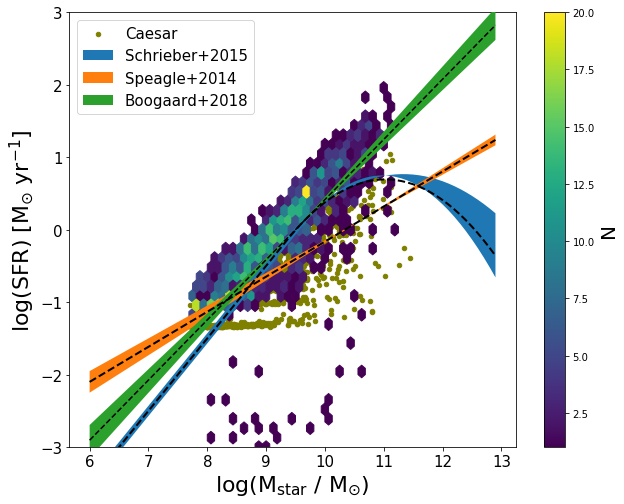

In [382]:
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
plt.hexbin(np.log10(dir_dmass), np.log10(dir_sfrs), gridsize=40, extent = (7, 12, -3, 3), mincnt=1,zorder=8, label=None)
cbar = plt.colorbar()
cbar.set_label('N', fontsize=20)

plt.scatter(np.log10(caesar_masses), np.log10(caesar_sfrs50), s=20, color='olive', label='Caesar')

plt.plot(mass_range, logsfr_sch, color='black', lw=2, ls='--', zorder=18)
plt.fill_between(mass_range, y1=logsfr_sch_low, y2=logsfr_sch_high, zorder=18, label='Schrieber+2015')

plt.plot(mass_range, logsfr_speagle_med, color='black', ls='--', lw=2, zorder=18)
plt.fill_between(mass_range, y1=logsfr_speagle_low, y2=logsfr_speagle_high, zorder=18, label='Speagle+2014')


plt.plot(mass_range, logsfr_muse, zorder=20, color='black', ls='--')
plt.fill_between(mass_range, y1=logsfr_muse_low, y2=logsfr_muse_high, zorder=18, label='Boogaard+2018')
#plt.scatter(np.log10(tau_dmass), np.log10(tau_sfrs), marker='+', s=50, color='gray',zorder=0, label=r'Delayed $\tau$')
#plt.scatter(np.log10(burst_dmass), np.log10(burst_sfrs), marker='x', s=50, color='orange',zorder=0, label=r'Delayed $\tau$+Burst')

plt.ylim([-3, 3])
plt.ylabel('log(SFR) [M$_{\odot}$ yr$^{-1}$]', fontsize=22)
plt.xlabel('log(M$_\mathrm{star}$ / M$_{\odot}$)', fontsize=22)

plt.legend(loc='upper left', fontsize=15)
#plt.savefig('/Users/sidneylower/Documents/snap305_dirichlet/MS_old.png', dpi=300)



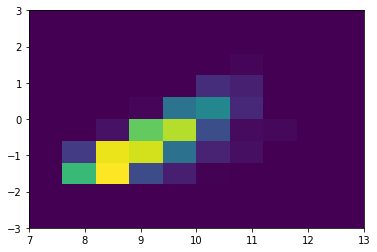

In [369]:
counts_c,xbins_c,ybins_c,image = plt.hist2d(np.log10(caesar_masses), np.log10(caesar_sfrs50), range=[[7, 13], [-3, 3]])

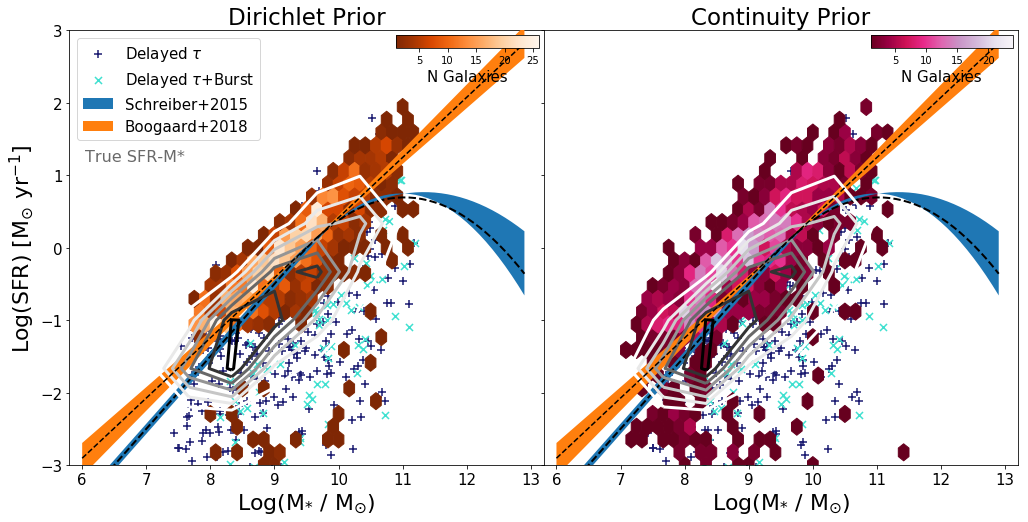

In [458]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(17, 8))
plt.subplots_adjust(wspace=0., hspace=0)
for ax in (ax1, ax2):
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor')
    ax.set_ylim([-3, 3])
    ax.set_xlim([5.8, 13.2])
    ax1.set_ylabel('Log(SFR) [M$_{\odot}$ yr$^{-1}$]', fontsize=22)
    ax.set_xlabel('Log(M$_\mathrm{*}$ / M$_{\odot}$)', fontsize=22)
    ax.contour(counts_c.transpose(),extent=[xbins_c.min(),xbins_c.max(),ybins_c.min(),ybins_c.max()],linewidths=3, cmap = plt.cm.Greys, zorder=20)
    ax.scatter(np.log10(tau_dmass), np.log10(tau_sfrs), marker='+', s=50, color='midnightblue',zorder=0, label=r'Delayed $\tau$')
    ax.scatter(np.log10(burst_dmass), np.log10(burst_sfrs), marker='x', s=50, color='turquoise',zorder=0, label=r'Delayed $\tau$+Burst')
    #ax.plot(mass_range, logsfr_speagle_med, color='black', ls='--', lw=2, zorder=18)
    #ax.fill_between(mass_range, y1=logsfr_speagle_low, y2=logsfr_speagle_high, zorder=18, label='Speagle+2014')
    ax.plot(mass_range, logsfr_sch, color='black', lw=2, ls='--',  zorder=18)
    ax.fill_between(mass_range, y1=logsfr_sch_low, y2=logsfr_sch_high, zorder=18,label='Schreiber+2015')
    ax.plot(mass_range, logsfr_muse, zorder=20, color='black', ls='--')
    ax.fill_between(mass_range, y1=logsfr_muse_low, y2=logsfr_muse_high, zorder=18, label='Boogaard+2018')
    
a = ax1.hexbin(np.log10(dir_dmass), np.log10(dir_sfrs), gridsize=30, extent = (7, 12, -3, 3), mincnt=1,zorder=8, label=None, cmap = plt.cm.Oranges_r)
cbaxes = inset_axes(ax1, width="30%", height="3%", loc='upper right') 
cbar_a = fig.colorbar(a, cax=cbaxes, orientation='horizontal', label='N Galaxies')
cbar_a.set_label('N Galaxies', fontsize=15)
b= ax2.hexbin(np.log10(cont_dmass), np.log10(cont_sfrs), gridsize=30, extent = (7, 12, -3, 3), mincnt=1,zorder=8, label=None, cmap = plt.cm.PuRd_r)
cbaxes = inset_axes(ax2, width="30%", height="3%", loc='upper right') 
cbar_b = fig.colorbar(b, cax=cbaxes, orientation='horizontal', label='N Galaxies')
cbar_b.set_label('N Galaxies', fontsize=15)
ax1.annotate('True SFR-M*', xy=(6.05, 1.2), color='dimgrey', fontsize=16)

ax1.set_title('Dirichlet Prior', fontsize=23)
ax2.set_title('Continuity Prior', fontsize=23)
ax1.legend(loc='upper left', fontsize=15)

plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/MS.png', dpi=300,  bbox_inches='tight')

In [29]:
metals = np.load('/Users/sidneylower/Documents/snap305_dirichlet/snap305_massweightedZ.npz')['Z_massweighted']
solar = 0.0196

Text(0.5,0,'M*')

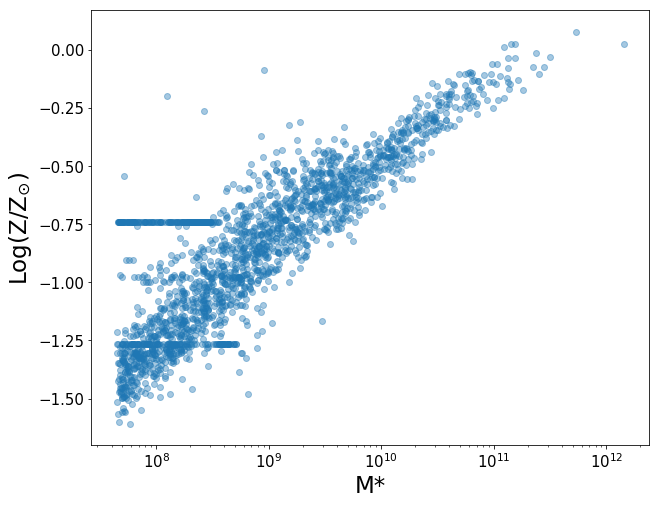

In [18]:
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
plt.scatter(caesar_masses, np.log10(metals / solar), alpha=0.4, label='Caesar')
plt.xscale('log')
plt.ylabel('Log(Z/Z$_{\odot}$)', fontsize=23)
plt.xlabel('M*', fontsize=23)

In [27]:
#dir_Z = diri.loc[(slice(None), list(dict.fromkeys(diri.index.get_level_values('Time [Gyr]')))[0]), 'Metallicity']
#cont_Z = cont.loc[(slice(None), list(dict.fromkeys(cont.index.get_level_values('Time [Gyr]')))[0]), 'Metallicity']
#cal_Z = dir_calzetti.loc[(slice(None), list(dict.fromkeys(dir_calzetti.index.get_level_values('Time [Gyr]')))[0]), 'Metallicity']

cmassmetal_Z = cont_massmetal.loc[(slice(None), list(dict.fromkeys(cont_massmetal.index.get_level_values('Time [Gyr]')))[0]), 'Metallicity']




In [75]:
galaxies_in_dir = list(dict.fromkeys(diri.index.get_level_values('Galaxy')))
galaxies_in_cont = list(dict.fromkeys(cont.index.get_level_values('Galaxy')))
galaxies_in_tau = list(dict.fromkeys(tau.index.get_level_values('Galaxy')))
galaxies_in_burst = list(dict.fromkeys(burst.index.get_level_values('Galaxy')))

In [76]:
dir_idx = [int(x) for x in galaxies_in_dir]
cont_idx = [int(x) for x in galaxies_in_cont]
burst_idx = [int(x) for x in galaxies_in_burst]
tau_idx = [int(x) for x in galaxies_in_tau]

In [77]:
galaxies_in_all = set(dir_idx) & set(cont_idx) & set(burst_idx) & set(tau_idx)

In [32]:
intrinsic_Zcmm = metals[cmassmetal_idx]

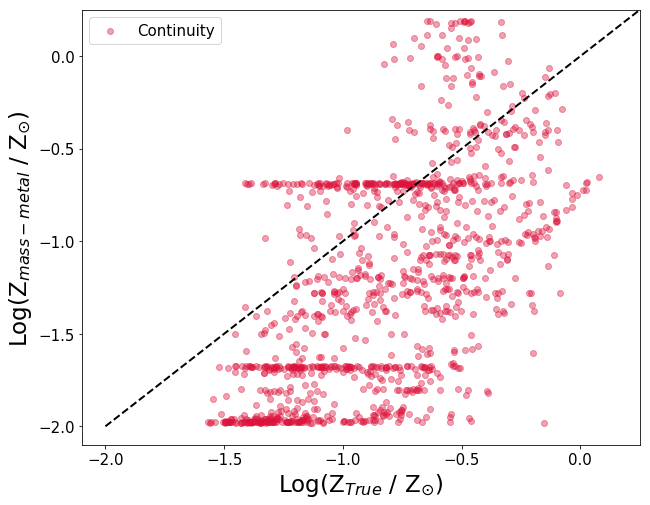

In [36]:
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
plt.scatter(np.log10(intrinsic_Zcmm / solar), cmassmetal_Z, color='crimson', alpha=0.4, label='Continuity')
plt.plot([-2, 2.0], [-2, 2.], color='black', lw=2, ls='--')
plt.ylim([-2.1, 0.25])
plt.xlim([-2.1, 0.25])
plt.ylabel('Log(Z$_{mass-metal}$ / Z$_{\odot}$)', fontsize=23)
plt.xlabel('Log(Z$_{True}$ / Z$_{\odot}$)', fontsize=23)
plt.legend(loc='best', fontsize=15)

In [38]:
Zcmm_ratio = np.log10((10**(cmassmetal_Z) * solar) / intrinsic_Zcmm)

No handles with labels found to put in legend.


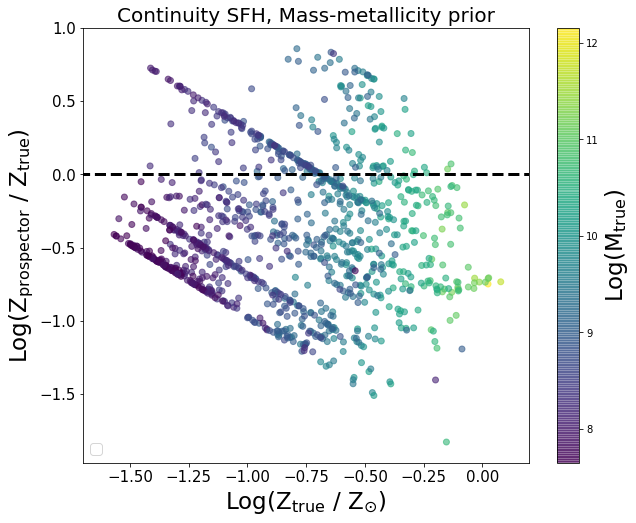

In [52]:
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
plt.scatter(np.log10(intrinsic_Zcmm / solar), Zcmm_ratio, c = np.log10(c_massmetal_imass), alpha=0.6, label=None)
plt.colorbar().set_label(label='Log(M$_\mathrm{true}$)',size=23)
plt.plot([-12.5, 0.5],[0., 0.] ,color='black', lw=3, ls='--')
#plt.plot( np.log10(intrinsic_Zcmm / solar), np.log10((10**-2.0 * solar) / intrinsic_Zdir), ls=':', lw=2, label='Log(Z$_\mathrm{dirichlet}$ / Z$_\mathrm{\odot}$) = -2.0')
plt.xlim([-1.7, 0.2])
#plt.ylim([-2.1, 0.25])
#plt.xlim([-2.1, 0.25])
plt.ylabel('Log(Z$_\mathrm{prospector}$ / Z$_\mathrm{true}$)', fontsize=23)
plt.xlabel('Log(Z$_\mathrm{true}$ / Z$_{\odot}$)', fontsize=23)
plt.title('Continuity SFH, Mass-metallicity prior', fontsize=20)
plt.legend(loc='lower left', fontsize=15)

plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/metal_ratio_cmm.png', dpi=300, bbox_inches='tight')

In [424]:
intrinsic_Zdir = metals[dir_idx]

Text(0.5,0,'Log(Z$_{Intrinsic}$ / Z$_{\\odot}$)')

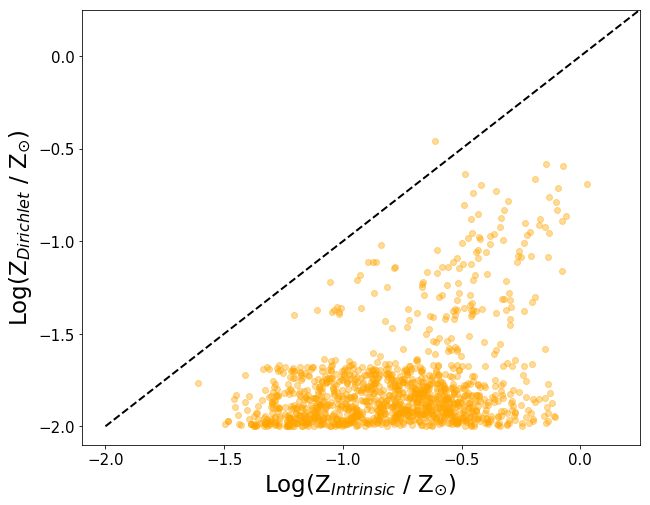

In [23]:
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
plt.scatter(np.log10(intrinsic_Zdir / solar), dir_Z, color='orange', alpha=0.4)
plt.plot([-2, 2.0], [-2, 2.], color='black', lw=2, ls='--')
plt.ylim([-2.1, 0.25])
plt.xlim([-2.1, 0.25])
plt.ylabel('Log(Z$_{Dirichlet}$ / Z$_{\odot}$)', fontsize=23)
plt.xlabel('Log(Z$_{Intrinsic}$ / Z$_{\odot}$)', fontsize=23)

In [425]:
Zd_ratio = np.log10((10**(dir_Z) * solar) / intrinsic_Zdir)

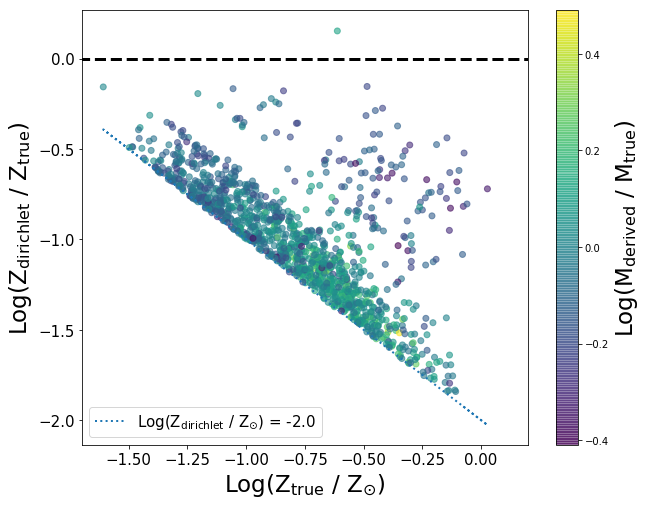

In [467]:
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
plt.scatter(np.log10(intrinsic_Zdir / solar), Zd_ratio, c = ratio_d, alpha=0.6, label=None)
plt.colorbar().set_label(label='Log(M$_\mathrm{derived}$ / M$_\mathrm{true}$)',size=23)
plt.plot([-12.5, 0.5],[0., 0.] ,color='black', lw=3, ls='--')
plt.plot( np.log10(intrinsic_Zdir / solar), np.log10((10**-2.0 * solar) / intrinsic_Zdir), ls=':', lw=2, label='Log(Z$_\mathrm{dirichlet}$ / Z$_\mathrm{\odot}$) = -2.0')
plt.xlim([-1.7, 0.2])
#plt.ylim([-2.1, 0.25])
#plt.xlim([-2.1, 0.25])
plt.ylabel('Log(Z$_\mathrm{dirichlet}$ / Z$_\mathrm{true}$)', fontsize=23)
plt.xlabel('Log(Z$_\mathrm{true}$ / Z$_{\odot}$)', fontsize=23)
plt.legend(loc='lower left', fontsize=15)

plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/metal_ratio_dir.png', dpi=300, bbox_inches='tight')



In [55]:
intrinsic_Zcal = metals[cal_idx]
Zc_ratio = np.log10((10**(cal_Z) * solar) / intrinsic_Zcal)

Text(0.5,0,'Log(Z$_{Intrinsic}$ / Z$_{\\odot}$)')

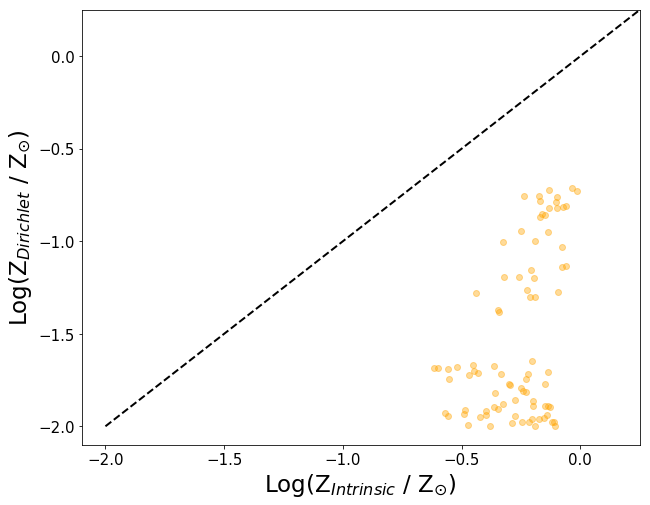

In [56]:
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
plt.scatter(np.log10(intrinsic_Zcal / solar), cal_Z, color='orange', alpha=0.4)
plt.plot([-2, 2.0], [-2, 2.], color='black', lw=2, ls='--')
plt.ylim([-2.1, 0.25])
plt.xlim([-2.1, 0.25])
plt.ylabel('Log(Z$_{Dirichlet}$ / Z$_{\odot}$)', fontsize=23)
plt.xlabel('Log(Z$_{Intrinsic}$ / Z$_{\odot}$)', fontsize=23)

In [432]:
intrinsic_Zcont = metals[cont_idx]
Zc_ratio = np.log10((10**(cont_Z) * solar) / intrinsic_Zcont)

Text(0.5,0,'Log(Z$_{Intrinsic}$ / Z$_{\\odot}$)')

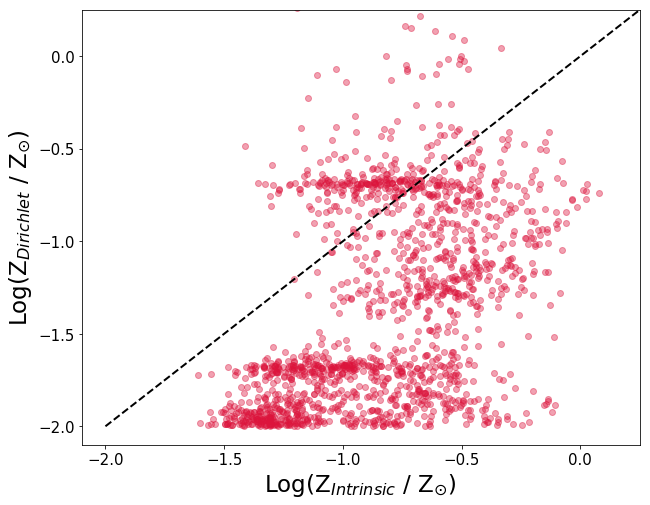

In [41]:
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
plt.scatter(np.log10(intrinsic_Zcont / solar), cont_Z, color='crimson', alpha=0.4)
plt.plot([-2, 2.0], [-2, 2.], color='black', lw=2, ls='--')
plt.ylim([-2.1, 0.25])
plt.xlim([-2.1, 0.25])
plt.ylabel('Log(Z$_{Dirichlet}$ / Z$_{\odot}$)', fontsize=23)
plt.xlabel('Log(Z$_{Intrinsic}$ / Z$_{\odot}$)', fontsize=23)

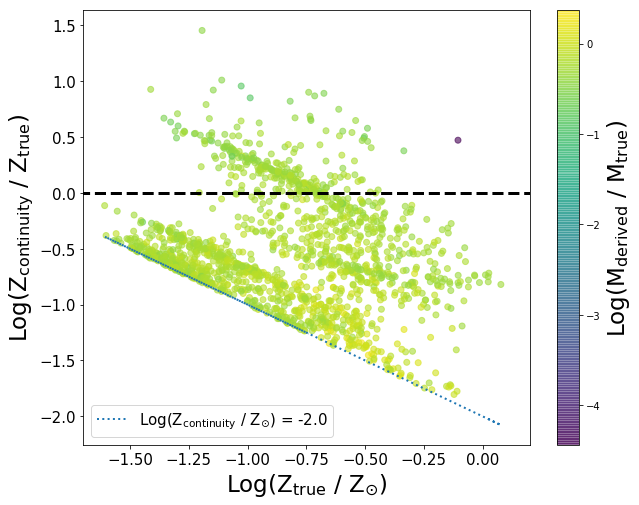

In [468]:
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
plt.scatter(np.log10(intrinsic_Zcont / solar), Zc_ratio, c = ratio_c, alpha=0.6, label=None)
plt.colorbar().set_label(label='Log(M$_\mathrm{derived}$ / M$_\mathrm{true}$)',size=23)
plt.plot([-12.5, 0.5],[0., 0.] ,color='black', lw=3, ls='--')
plt.plot( np.log10(intrinsic_Zcont / solar), np.log10((10**-2.0 * solar) / intrinsic_Zcont), ls=':', lw=2, label='Log(Z$_\mathrm{continuity}$ / Z$_{\odot}$) = -2.0')
plt.xlim([-1.7, 0.2])
#plt.ylim([-2.1, 0.25])
#plt.xlim([-2.1, 0.25])
plt.ylabel('Log(Z$_\mathrm{continuity}$ / Z$_\mathrm{true}$)', fontsize=23)
plt.xlabel('Log(Z$_\mathrm{true}$ / Z$_{\odot}$)', fontsize=23)
plt.legend(loc='lower left', fontsize=15)
plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/metal_ratio_cont.png', dpi=300, bbox_inches='tight')



In [111]:
def true_massweighted_age(sfh, time):
    from scipy.integrate import simps
    sfh = np.asarray(sfh)
    sfh_time = []
    for i in range(len(time)):
        sfh_time.append(sfh[i]*time[i])

    top = simps(sfh_time, dx=0.01)
    bottom = simps(sfh, dx=0.01)

    return top/bottom

def nonpara_massweighted_age(sfh, time):
    top = 0.0
    bottom = 0.0
    sfh = np.asarray(sfh)
    for bin_ in range(len(sfh)):
        top += sfh[bin_] * time[bin_]
        bottom += sfh[bin_]
    return top / bottom

In [114]:
c_mweighted_age = []
c_timelist = list(dict.fromkeys(caesar_data.index.get_level_values('Time [Gyr]')))
for gal in range(2000):
    c_sfrlist = caesar_data.loc[[gal]]['SFR']
    c_mweighted_age.append(true_massweighted_age(c_sfrlist, c_timelist))

In [ ]:
galaxies_in_dir = list(dict.fromkeys(diri.index.get_level_values('Galaxy')))

In [218]:
dir_mweighted_age = []
dir_timelist = list(dict.fromkeys(diri.index.get_level_values('Time [Gyr]')))
for gal in galaxies_in_dir:
    dir_sfrlist = np.unique(diri.loc[["{:03d}".format(gal)]]['SFR'])
    #dir_mweighted_age.append(nonpara_massweighted_age(dir_sfrlist, dir_timelist))

In [129]:
galaxies_in_dirmm = list(dict.fromkeys(dir_massmetal.index.get_level_values('Galaxy')))

In [131]:
dirmm_mweighted_age = []
dirmm_timelist = list(dict.fromkeys(dir_massmetal.index.get_level_values('Time [Gyr]')))
for gal in galaxies_in_dirmm:
    dir_sfrlist = np.unique(dir_massmetal.loc[["{:03d}".format(int(gal))]]['SFR'])
    dirmm_mweighted_age.append(nonpara_massweighted_age(dir_sfrlist, dir_timelist))

In [261]:
galaxies_in_contmm = list(dict.fromkeys(cont_massmetal.index.get_level_values('Galaxy')))

In [143]:
contmm_mweighted_age = []
contmm_timelist = list(dict.fromkeys(cont_massmetal.index.get_level_values('Time [Gyr]')))
for gal in galaxies_in_cont:
    contmm_sfrlist = np.unique(cont_massmetal.loc[["{:03d}".format(int(gal))]]['SFR'])
    contmm_mweighted_age.append(nonpara_massweighted_age(contmm_sfrlist, contmm_timelist))

In [144]:
#dir_ageRatio = np.array(dir_mweighted_age) / np.array([c_mweighted_age[i] for i in galaxies_in_dir])
dirmm_ageRatio = np.array(dirmm_mweighted_age) / np.array([c_mweighted_age[int(i)] for i in galaxies_in_dirmm])
contmm_ageRatio = np.array(contmm_mweighted_age) / np.array([c_mweighted_age[int(i)] for i in galaxies_in_contmm])

(0.5, 10.0)

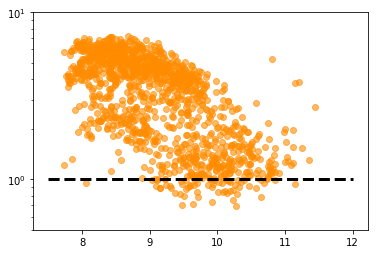

In [243]:
plt.scatter(np.log10(dir_imass), dir_ageRatio, color='darkorange', alpha=0.6)
plt.plot([7.5, 12], [1.0, 1.0], lw=3, ls='--', color='black')
plt.yscale('log')
plt.ylim([5e-1, 1e1])

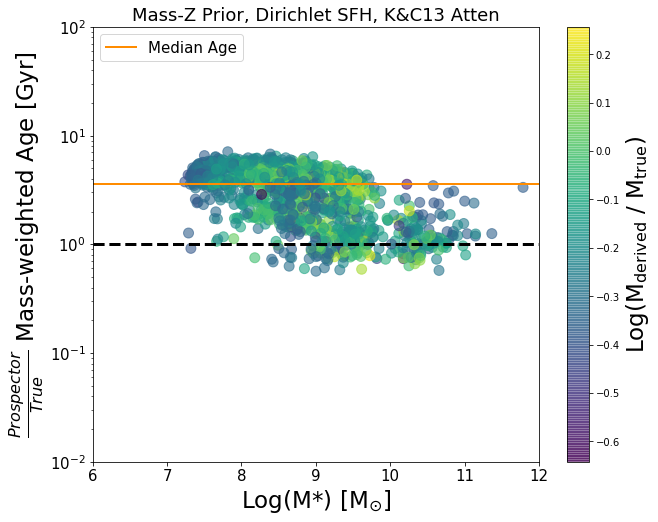

In [146]:
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
ratio_dirmm = dir_massmetal.loc[(slice(None), list(dict.fromkeys(dir_massmetal.index.get_level_values('Time [Gyr]')))[0]), 'Derived Stellar Mass'] / (dir_massmetal.loc[(slice(None), list(dict.fromkeys(dir_massmetal.index.get_level_values('Time [Gyr]')))[0]), 'Intrinsic Stellar Mass'] / 1.989e33)
plt.scatter(np.log10(dir_massmetal.loc[(slice(None), list(dict.fromkeys(dir_massmetal.index.get_level_values('Time [Gyr]')))[0]), 'Derived Stellar Mass']), 
            dirmm_ageRatio, c=np.log10(ratio_dirmm), s=100, alpha=0.6)
plt.colorbar().set_label(label='Log(M$_\mathrm{derived}$ / M$_\mathrm{true}$)',size=23)
plt.plot([6, 12], [1.0, 1.0], lw=3, ls='--', color='black')
plt.plot([6, 12], [np.median(dirmm_ageRatio), np.median(dirmm_ageRatio)], color='darkorange', lw=2, label='Median Age')
plt.yscale('log')
plt.ylim([1e-2, 100])
plt.xlim([6, 12])

plt.ylabel(r'$\frac{Prospector}{True}$ Mass-weighted Age [Gyr]', fontsize=23)
plt.xlabel('Log(M*) [M$_{\odot}$]', fontsize=23)
plt.legend(loc='upper left', fontsize=15)
plt.title('Mass-Z Prior, Dirichlet SFH, K&C13 Atten', fontsize=18)

plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/dirmm_age.png', dpi=300)

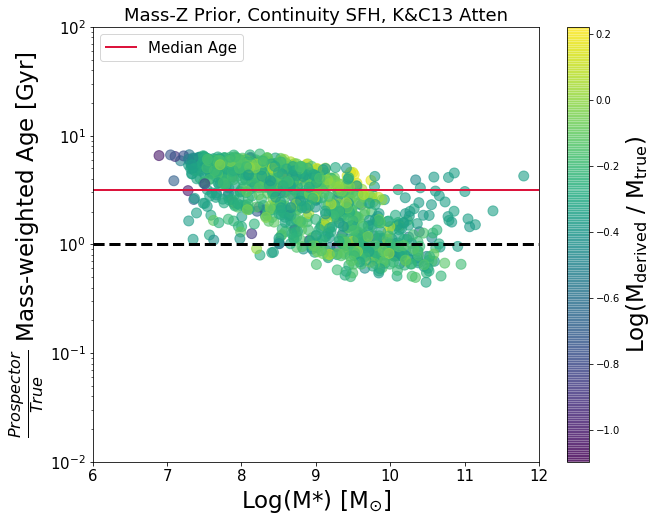

In [147]:
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
ratio_contmm = cont_massmetal.loc[(slice(None), list(dict.fromkeys(cont_massmetal.index.get_level_values('Time [Gyr]')))[0]), 'Derived Stellar Mass'] / (cont_massmetal.loc[(slice(None), list(dict.fromkeys(cont_massmetal.index.get_level_values('Time [Gyr]')))[0]), 'Intrinsic Stellar Mass'] / 1.989e33)
plt.scatter(np.log10(cont_massmetal.loc[(slice(None), list(dict.fromkeys(cont_massmetal.index.get_level_values('Time [Gyr]')))[0]), 'Derived Stellar Mass']), 
            contmm_ageRatio, c=np.log10(ratio_contmm), s=100, alpha=0.6)
plt.colorbar().set_label(label='Log(M$_\mathrm{derived}$ / M$_\mathrm{true}$)',size=23)
plt.plot([6, 12], [1.0, 1.0], lw=3, ls='--', color='black')
plt.plot([6, 12], [np.median(contmm_ageRatio), np.median(contmm_ageRatio)], color='crimson', lw=2, label='Median Age')
plt.yscale('log')
plt.ylim([1e-2, 1e2])
plt.xlim([6, 12])

plt.ylabel(r'$\frac{Prospector}{True}$ Mass-weighted Age [Gyr]', fontsize=23)
plt.xlabel('Log(M*) [M$_{\odot}$]', fontsize=23)
plt.legend(loc='upper left', fontsize=15)
plt.title('Mass-Z Prior, Continuity SFH, K&C13 Atten', fontsize=18)

plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/contmm_age.png', dpi=300)

In [113]:
tau_mweighted_age = []
tau_timelist = list(dict.fromkeys(tau.index.get_level_values('Time [Gyr]')))
for gal in galaxies_in_tau:
    tau_sfrlist = tau.loc[["{:03d}".format(int(gal))]]['SFR']
    tau_mweighted_age.append(true_massweighted_age(tau_sfrlist, tau_timelist))

In [140]:
tau_ageRatio = np.array(tau_mweighted_age) / np.array([c_mweighted_age[int(i)] for i in galaxies_in_tau])

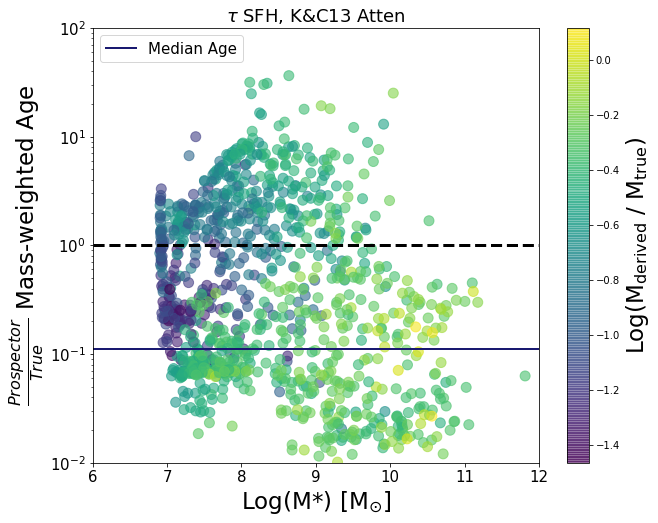

In [141]:
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
ratio_tau = tau.loc[(slice(None), list(dict.fromkeys(tau.index.get_level_values('Time [Gyr]')))[0]), 'Derived Stellar Mass'] / (tau.loc[(slice(None), list(dict.fromkeys(tau.index.get_level_values('Time [Gyr]')))[0]), 'Intrinsic Stellar Mass'] / 1.989e33)
plt.scatter(np.log10(tau.loc[(slice(None), list(dict.fromkeys(tau.index.get_level_values('Time [Gyr]')))[0]), 'Derived Stellar Mass']), 
            tau_ageRatio, c=np.log10(ratio_t), s=100, alpha=0.6)
plt.colorbar().set_label(label='Log(M$_\mathrm{derived}$ / M$_\mathrm{true}$)',size=23)
plt.plot([6, 12], [1.0, 1.0], lw=3, ls='--', color='black')
plt.plot([6., 12], [np.median(tau_ageRatio), np.median(tau_ageRatio)], color='midnightblue', lw=2, label='Median Age')
plt.yscale('log')
plt.ylim([1e-2, 1e2])
plt.xlim([6, 12])

plt.ylabel(r'$\frac{Prospector}{True}$ Mass-weighted Age', fontsize=23)
plt.xlabel('Log(M*) [M$_{\odot}$]', fontsize=23)

plt.title(r'$\tau$ SFH, K&C13 Atten', fontsize=18)
plt.legend(loc='upper left', fontsize=15)
#plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/tau_age.png', dpi=300)

In [183]:
burst_mweighted_age = []
galaxies_in_burst = list(dict.fromkeys(burst.index.get_level_values('Galaxy')))
burst_timelist = list(dict.fromkeys(burst.index.get_level_values('Time [Gyr]')))
for gal in galaxies_in_burst:
    burst_sfrlist = burst.loc[["{:03d}".format(int(gal))]]['SFR']
    burst_mweighted_age.append(true_massweighted_age(burst_sfrlist, burst_timelist))
    
    
    

In [184]:
burst_ageRatio = np.array(burst_mweighted_age) / np.array([c_mweighted_age[int(i)] for i in galaxies_in_burst])

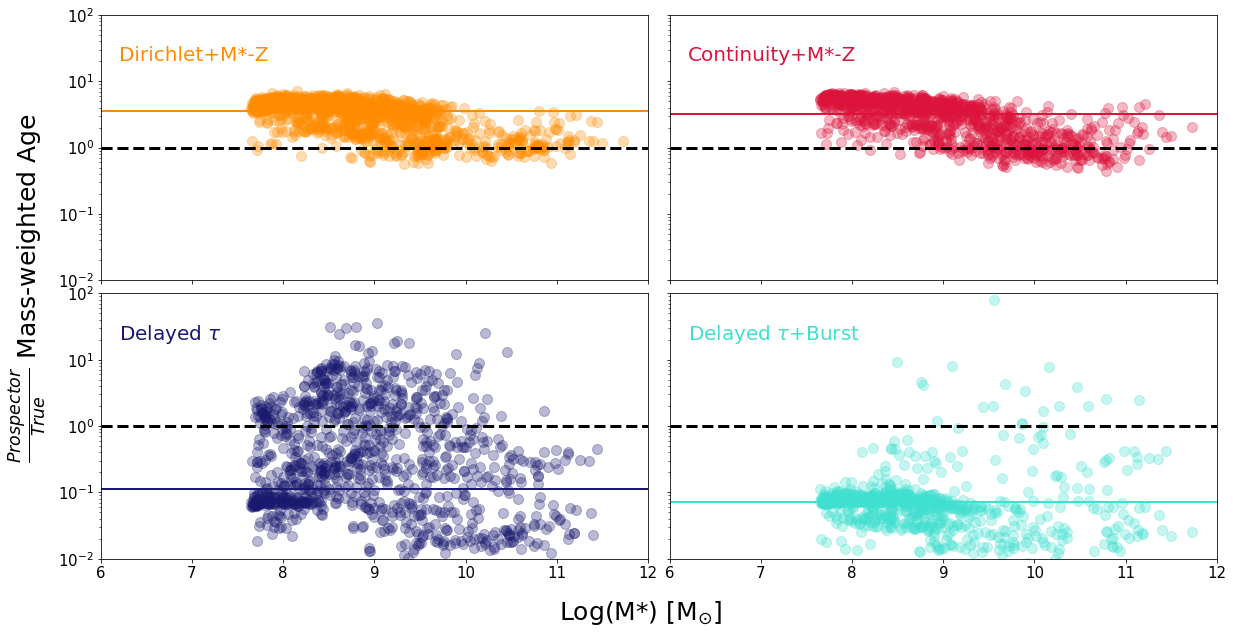

In [217]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(20, 10))
plt.subplots_adjust(wspace=0.04, hspace=0.05)
for ax in (ax1, ax2, ax3, ax4):
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor')
    ax.set_yscale('log')
    ax.set_ylim([1e-2, 1e2])
    ax.set_xlim([6, 12])
    ax.plot([6, 12], [1.0, 1.0], lw=3, ls='--', color='black')

fig.text(0.5, 0.04,'Log(M*) [M$_{\odot}$]' , ha='center', fontsize=25)
fig.text(0.06, 0.5, r'$\frac{Prospector}{True}$ Mass-weighted Age', va='center', rotation='vertical', fontsize=25)

#dirichlet
ax1.plot([6, 12], [np.median(dirmm_ageRatio), np.median(dirmm_ageRatio)], color='darkorange', lw=2, label='Median Age')
ax1.scatter(np.log10(dir_massmetal.loc[(slice(None), list(dict.fromkeys(dir_massmetal.index.get_level_values('Time [Gyr]')))[0]), 'Intrinsic Stellar Mass'] / 1.989e33), 
            dirmm_ageRatio, color='darkorange', s=100, alpha=0.3)
ax1.annotate('Dirichlet+M*-Z', xy=(6.2, 20), fontsize=20, color='darkorange')
    
#continuity
ax2.scatter(np.log10(cont_massmetal.loc[(slice(None), list(dict.fromkeys(cont_massmetal.index.get_level_values('Time [Gyr]')))[0]), 'Intrinsic Stellar Mass']/ 1.989e33), 
            contmm_ageRatio, color='crimson', s=100, alpha=0.3)   
ax2.plot([6, 12], [np.median(contmm_ageRatio), np.median(contmm_ageRatio)], color='crimson', lw=2, label='Median Age')
ax2.annotate('Continuity+M*-Z', xy=(6.2, 20), fontsize=20, color='crimson') 

#tau
ax3.scatter(np.log10(tau.loc[(slice(None), list(dict.fromkeys(tau.index.get_level_values('Time [Gyr]')))[0]), 'Intrinsic Stellar Mass']/ 1.989e33), 
            tau_ageRatio, color='midnightblue', s=100, alpha=0.3)
ax3.plot([6., 12], [np.median(tau_ageRatio), np.median(tau_ageRatio)], color='midnightblue', lw=2, label='Median Age')
ax3.annotate(r'Delayed $\tau$', xy=(6.2, 20), fontsize=20, color='midnightblue')     

#burst
ax4.scatter(np.log10(burst.loc[(slice(None), list(dict.fromkeys(burst.index.get_level_values('Time [Gyr]')))[0]), 'Intrinsic Stellar Mass']/ 1.989e33), 
            burst_ageRatio, color='turquoise', s=100, alpha=0.3)
ax4.plot([6., 12], [np.median(burst_ageRatio), np.median(burst_ageRatio)], color='turquoise', lw=2, label='Median Age')
ax4.annotate(r'Delayed $\tau$+Burst', xy=(6.2, 20), fontsize=20, color='turquoise')     
 
    
plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/ages_comp.png', dpi=300, bbox_inches='tight')


In [208]:
galaxies_in_contmm = list(dict.fromkeys(cont_massmetal.index.get_level_values('Galaxy')))
galaxies_in_contmm = [int(x) for x in galaxies_in_contmm]
galaxies_in_dirmm = list(dict.fromkeys(dir_massmetal.index.get_level_values('Galaxy')))
galaxies_in_dirmm = [int(x) for x in galaxies_in_dirmm]
galaxies_in_cont = list(dict.fromkeys(cont.index.get_level_values('Galaxy')))
galaxies_in_cont = [int(x) for x in galaxies_in_cont]
galaxies_in_dir = list(dict.fromkeys(diri.index.get_level_values('Galaxy')))
galaxies_in_dir = [int(x) for x in galaxies_in_dir]
galaxies_in_tau = list(dict.fromkeys(tau.index.get_level_values('Galaxy')))
galaxies_in_tau = [int(x) for x in galaxies_in_tau]
galaxies_in_burst = list(dict.fromkeys(burst.index.get_level_values('Galaxy')))
galaxies_in_burst = [int(x) for x in galaxies_in_burst]

In [211]:
caesar_sfrs = caesar_sfr50['sfr_50']
dir_sfrs = list(dict.fromkeys(diri['SFR']))[::11]
cont_sfrs = list(dict.fromkeys(cont['SFR']))[::10]
contmm_sfrs = list(dict.fromkeys(cont_massmetal['SFR']))[::9]
dirmm_sfrs = list(dict.fromkeys(dir_massmetal['SFR']))[::9]
tau_sfrs = tau['SFR'][275::276]
burst_sfrs = burst['SFR'][276::277]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


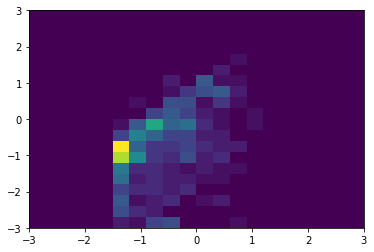

In [74]:
contour_t,xbins_t,ybins_t,image = plt.hist2d(np.log10(caesar_sfrs[galaxies_in_tau]), np.log10(tau_sfrs), bins=20, range=[[-3, 3], [-3, 3]])


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


(-2, 2)

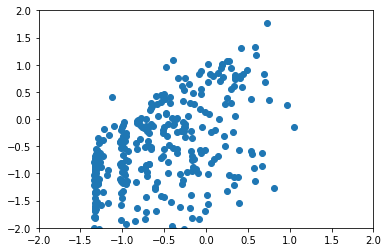

In [96]:
plt.scatter(np.log10(caesar_sfrs[galaxies_in_tau]), np.log10(tau_sfrs))
plt.xlim([-2, 2])
plt.ylim([-2, 2])

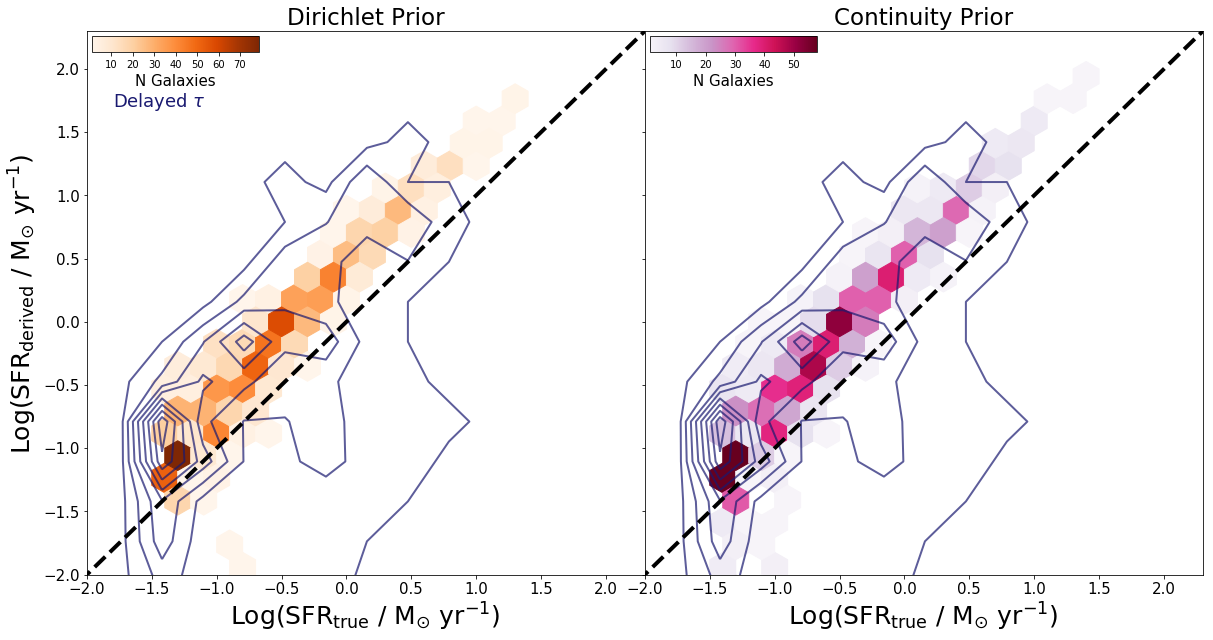

In [194]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 10))
plt.subplots_adjust(wspace=0, hspace=0)
for ax in (ax1, ax2):
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor')
    ax.plot([-3, 3], [-3, 3], color='black', ls='--', lw=4)
    ax.set_ylim([-2, 2.3])
    ax.set_xlim([-2, 2.3])
    ax.set_xlabel('Log(SFR$_\mathrm{true}$ / M$_{\odot}$ yr$^{-1}$) ', fontsize=25)
    ax1.set_ylabel('Log(SFR$_\mathrm{derived}$ / M$_{\odot}$ yr$^{-1}$) ', fontsize=25)
    ax.contour(contour_t.transpose(),levels=np.linspace(1.0, 60, 20),extent=[-3, 3, -3, 3],linewidths=2, colors='midnightblue', alpha=0.7)
   
    
a = ax1.hexbin(np.log10(caesar_sfrs[galaxies_in_dir]), np.log10(dir_sfrs), gridsize=30, extent=(-3, 3, -3, 3), mincnt=1, label=None, cmap = plt.cm.Oranges)    
cbaxes = inset_axes(ax1, width="30%", height="3%", loc='upper left') 
cbar_a = fig.colorbar(a, cax=cbaxes, orientation='horizontal', label='N Galaxies')
cbar_a.set_label('N Galaxies', fontsize=15)
b = ax2.hexbin(np.log10(caesar_sfrs[galaxies_in_cont]), np.log10(cont_sfrs),gridsize=30, extent=(-3, 3, -3, 3), mincnt=1, label=None, cmap = plt.cm.PuRd)
cbaxes = inset_axes(ax2, width="30%", height="3%", loc='upper left') 
cbar_b = fig.colorbar(b, cax=cbaxes, orientation='horizontal')
cbar_b.set_label('N Galaxies', fontsize=15)
ax1.set_title('Dirichlet Prior', fontsize=23)
ax2.set_title('Continuity Prior', fontsize=23)


ax1.annotate(r'Delayed $\tau$', xy=(-1.8, 1.7), color='midnightblue', fontsize=18)
plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/sfr_comp.png', dpi=300, bbox_inches='tight')


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


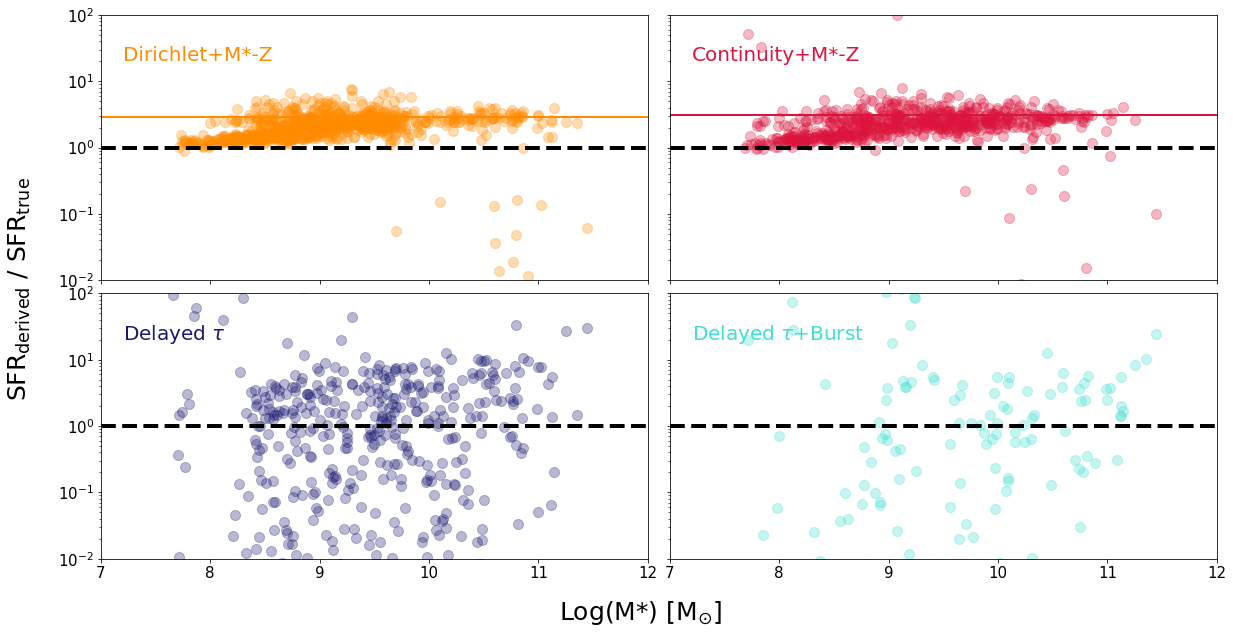

In [220]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(20, 10))
plt.subplots_adjust(wspace=0.04, hspace=0.05)
for ax in (ax1, ax2, ax3, ax4):
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor')
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor')
    ax.plot([7, 12], [1, 1], color='black', ls='--', lw=4)
    ax.set_yscale('log')
    ax.set_ylim([1e-2, 1e2])
    ax.set_xlim([7, 12])

fig.text(0.5, 0.04,'Log(M*) [M$_{\odot}$]' , ha='center', fontsize=25)
fig.text(0.06, 0.5, 'SFR$_\mathrm{derived}$ / SFR$_\mathrm{true}$', va='center', rotation='vertical', fontsize=25)

#dirichlet
ax1.plot([7,12], [np.median(dirmm_sfrs/caesar_sfrs[galaxies_in_dirmm]), np.median(dirmm_sfrs/caesar_sfrs[galaxies_in_dirmm])], color='darkorange', lw=2)
ax1.scatter(np.log10(dir_massmetal.loc[(slice(None), list(dict.fromkeys(dir_massmetal.index.get_level_values('Time [Gyr]')))[0]), 'Intrinsic Stellar Mass']/ 1.989e33), dirmm_sfrs/caesar_sfrs[galaxies_in_dirmm], color='darkorange', s=100, alpha=0.3)
ax1.annotate('Dirichlet+M*-Z', xy=(7.2, 20), fontsize=20, color='darkorange')
    
#continuity
ax2.plot([7,12], [np.median(contmm_sfrs/caesar_sfrs[galaxies_in_contmm]), np.median(contmm_sfrs/caesar_sfrs[galaxies_in_contmm])], color='crimson', lw=2)
ax2.scatter(np.log10(cont_massmetal.loc[(slice(None), list(dict.fromkeys(cont_massmetal.index.get_level_values('Time [Gyr]')))[0]), 'Intrinsic Stellar Mass']/ 1.989e33), contmm_sfrs/caesar_sfrs[galaxies_in_contmm], color='crimson', s=100, alpha=0.3)
ax2.annotate('Continuity+M*-Z', xy=(7.2, 20), fontsize=20, color='crimson')

#tau
ax3.scatter(np.log10(tau.loc[(slice(None), list(dict.fromkeys(tau.index.get_level_values('Time [Gyr]')))[0]), 'Intrinsic Stellar Mass']/ 1.989e33), tau_sfrs/caesar_sfrs[galaxies_in_tau], color='midnightblue', s=100, alpha=0.3)
ax3.plot([7,12], [np.median(tau_sfrs/caesar_sfrs[galaxies_in_tau]), np.median(tau_sfrs/caesar_sfrs[galaxies_in_tau])], color='midnightblue', lw=2, label='Median Age')
ax3.annotate(r'Delayed $\tau$', xy=(7.2, 20), fontsize=20, color='midnightblue')     

#burst
ax4.scatter(np.log10(burst.loc[(slice(None), list(dict.fromkeys(burst.index.get_level_values('Time [Gyr]')))[0]), 'Intrinsic Stellar Mass']/ 1.989e33), burst_sfrs/caesar_sfrs[galaxies_in_burst], color='turquoise', s=100, alpha=0.3)
ax4.plot([7,12], [np.median(burst_sfrs/caesar_sfrs[galaxies_in_burst]), np.median(burst_sfrs/caesar_sfrs[galaxies_in_burst])], color='turquoise', lw=2, label='Median Age')
ax4.annotate(r'Delayed $\tau$+Burst', xy=(7.2, 20), fontsize=20, color='turquoise')      
 
    
plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/sfr_comp_grid_M*.png', dpi=300, bbox_inches='tight')
